# Project 4:Global Power Plant Database

Problem Statement:
    
Description:-
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. 
It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis.
The database covers approximately 35,000 power plants from 167 countries and includes thermal plants 
(e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power 
plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. 
It will be continuously updated as data becomes available.

Key attributes of the database:
The database includes the following indicators:-

•'country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•`country_long` (text): longer form of the country designation

•`name` (text): name or title of the power plant, generally in Romanized form

•`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•`capacity_mw` (number): electrical generating capacity in megawatts

•`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•`primary_fuel` (text): energy source used in primary electricity generation or export

•`other_fuel1` (text): energy source used in electricity generation or export

•`other_fuel2` (text): energy source used in electricity generation or export

•`other_fuel3` (text): energy source used in electricity generation or export

•`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•`owner` (text): majority shareholder of the power plant, generally in Romanized form

•`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•`url` (text): web document corresponding to the `source` field

•`geolocation_source` (text): attribution for geolocation information

•`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•`year_of_capacity_data` (number): year the capacity information was reported

•`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•`generation_data_source` (text): attribution for the reported generation information

•`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014

•`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016

•`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017

•'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation:

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction : We need to make two prediction  1) Primary Fuel    2) capacity_mw 

In [405]:
#loading the required libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score

In [406]:
#code for maximise rows ,columns,width,frame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [407]:
import pandas as pd
df=pd.read_csv("global_power_data.csv")  
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:
1.There are 907 rows and 27 columns.

2.There are so many Nan values which we need to convert by using imutation technique.

3.We will be predicting primary fuel as our first objective which is a categorical column so will consider this as a multi class classification problem.

4.We will be predicting capacity fuel as our second objective which is a numerical column and continuous data so we will apply regression techniques.

In [408]:
df.head()  #Checking out the top 5 rows of the dataset

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [409]:
df.shape #checking dimension of dataset

(907, 27)

There are 907 rows and 27 columns

In [410]:
df.dtypes #checking datatypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are 12 categorical columns and 15 float datatype.Categorical column need to be converted 
into numeric type before model building

In [411]:
df.columns #names of 27 features/columns names

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh'], dtype='object')

In [412]:
# description of the categorcal features
df.describe(include=np.object)

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
count,907,907,907,907,907,198,1,342,907,907,888,449
unique,1,1,907,907,8,3,1,280,191,304,3,1
top,IND,India,Bitta Solar Power Plant,IND0000393,Coal,Oil,Oil,Jk Cement ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
freq,907,907,1,1,258,195,1,4,519,519,765,449


Obervation:
1.Missing values are present which is evident from count .

2.There are 8 dinstinct category in primary fuel and 3 disntict category in other_fuel1.

3.There are 280 distinct owners in the dataset.

4.There are 191 distinct source .

5.There are three distinct geolocation_source.

6.This dataset contains powerplant details of the country India 

In [413]:
# description of  numerical feautres description using T as Transpose to be more readable and identifiable:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


Observation:
    
1.Missing data is there which is evident from count section.

2.We see there is no value in other_fuel3 whcich is irrelevant column which will be deleted later.

3.wepp_id(reference number for power plant) is also emty and having Nan which is irrelevant column.

4.generation_gwh_2013 :No values here,irrelevant coulmn,need to be deleted.
    
5.generation_gwh-2019:Novalues here,irrelevant column,need to be deleted.
    
6.estimated_generation_gwh:no values here,irrelevant column,need to be deleted.
    
7.Most of the columns mean is greater than median that means it is a positively skewed.

8.Minimum capacity of power_plant cant be zero,we need to check it further.

9.High gaps between 75% percentile and max values in capacity_mw,generation_gwh-2014 togeneration_gwh_2018 means 
there is presence of outliers.

<AxesSubplot:>

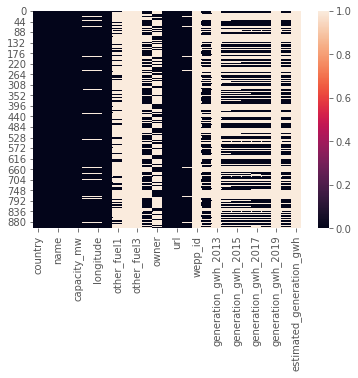

In [414]:
#Missing value checking using heatmap
sns.heatmap(df.isnull()) 

We can see so many white spaces in the graph against the columns indicated which shows that there is missing value

In [415]:
df.isnull().sum()   #Checking for null values in the dataset

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Considering the threshold at 51%,deleting the columns having missing value above 51% then we will do our data analysis.If we are going to consider all the missing values and do imputation technique then our model will be bias then it wont be a good model in predicting the values.

In [416]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2019","estimated_generation_gwh"], axis=1, inplace=True)

In [417]:
df.shape

(907, 15)

Thus our column has reduced from 27 to 15 after deletion of columns having mising value more than 51%,we cant delete all the columns having missing value,else we wont be able to analyse and our dataset will be small,so we will be performinh imputation technique for rest of the columns having mising value.

In [418]:
df.sample(5) #randomly generates five rows

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2018,generation_data_source
236,IND,India,GRACE INDUSTRIES,WRI1019956,25.0,20.0058,79.1845,Coal,NaN,Grace Industries ltd,http://www.graceindustries.com/,WRI,NaN,NaN,NaN
148,IND,India,CHIBRO (YAMUNA),IND0000082,240.0,30.5559,77.7915,Hydro,1975.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,805.48235,Central Electricity Authority
265,IND,India,HZL Palladum Wind Farm,WRI1026656,21.0,10.8674,77.4588,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1352...,WRI,NaN,NaN,NaN
799,IND,India,TEESTA-III,IND0000526,1200.0,27.5981,88.6505,Hydro,2017.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,4237.10800,Central Electricity Authority
124,IND,India,Belgaum Gadag Wind Farm,WRI1026073,24.8,15.4038,75.5625,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1204...,WRI,NaN,NaN,NaN


In [419]:
#lets check the unique values of all the columns using uunique() function 
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
commissioning_year         73
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2018       410
generation_data_source      1
dtype: int64

Thus we see that country,country_long which is long form of country meaning same can be deleted as
its irrelevant column for data analysis,also year_of_capacity_data and generation_data_source having one values in allthe columns which not helpful for data analysis,url which is the http adress also irrelevant from data analysis point of view ,name and gpdpr_idnr and geolocation_source are meaningless from data analysis point of view and wrt to prediction of capacity and primary_fuel. 

In [420]:
df.drop(["country", "country_long", "name", "gppd_idnr", "url","year_of_capacity_data"], axis=1, inplace=True)

In [421]:
df.drop(("generation_data_source"),axis=1,inplace=True)

In [422]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,7279.000000


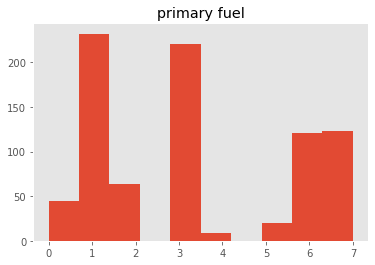

In [527]:
#checking imbalance in dataset 
df["primary_fuel"].hist(grid=False)
plt.title("primary fuel")
plt.show()

Thus we can see that data is imbalance,we will be using Smote techniue to baalnce it. 

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2018  448 non-null    float64
dtypes: float64(5), object(3)
memory usage: 56.8+ KB


Thus we can see that there are 8 columns present in our final dataset where 8 columns are categorical type and 8 are numeric type. 

# HANDLING MISSING VALUES 

In [425]:
df.isnull().sum()   #Checking again for null values in the final dataset

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2018    459
dtype: int64

In [426]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2018    float64
dtype: object

In [427]:
#latitue #longitute #commissioning_year ,generation_gwh_2018 for imputaion
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].mean(),inplace=True)
df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].mean(),inplace=True)

#Replacing the Nan values with this mean

In [428]:
#reaplcing Nan value with  Mode Imputation
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [429]:
df.isna().sum() #vallidating null values

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2018    0
dtype: int64

Thus we can see we have imputed all the missing values with mean as they are all numerica datatypes and categorical with mode imputation.

# Univariate Analysis For Categorical column

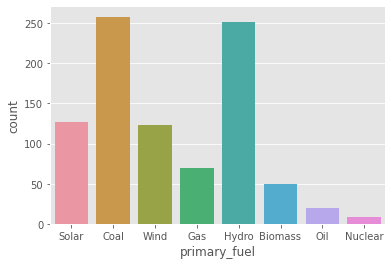

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


In [430]:
sns.countplot(x='primary_fuel', data=df)  #Plotting the primary fuel using countplot
plt.show()
print(df['primary_fuel'].value_counts())

Observation:
we observe that highest number of counts have been dominated by Coal and Hydra and then its wind and gas
and least is biomass,oil,nuclear may due to less consumption.

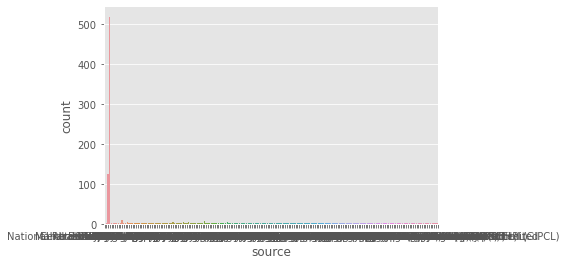

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Reliance Power Ltd                                               4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Acc Acc ltd                                                      4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Jk Cement ltd                                                    4
SunBorne Energy Gujarat One Private Limited                      3
Jaypee Ltd jccl)                                                 3
Ministry of New and Renewable Energy                             3
Solairedirect                                                    3
Hindustan Zinc ltd                                            

In [431]:
sns.countplot(x='source', data=df)  #Plotting the source using countplot
plt.show()
print(df['source'].value_counts())

Thus graph is not clear ,but we can see the all source values and found that Central Electricity has higest
number of counts followed by CDM.

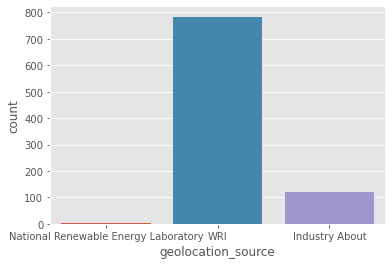

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


In [432]:
sns.countplot(x='geolocation_source', data=df)  #Plotting the geolocation_source using countplot
plt.show()
print(df['geolocation_source'].value_counts())

We observe that highest value geolocation_source is dominated by WRI(World Resource Institute) and least is by 
National Renewable Energy Laboratory

# Univariate Analysis of numerica datatypes:
    

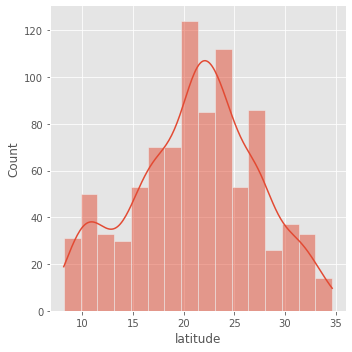

<Figure size 360x360 with 0 Axes>

In [433]:
sns.displot(df["latitude"],kde=True)
plt.figure(figsize=(5,5)) 
plt.show()         
    

The distribution is nearly normalised

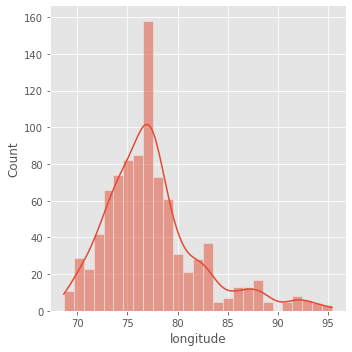

<Figure size 360x360 with 0 Axes>

In [434]:
sns.displot(df["longitude"],kde=True)
plt.figure(figsize=(5,5)) 
plt.show()         
    

The distribution is nealry normalised

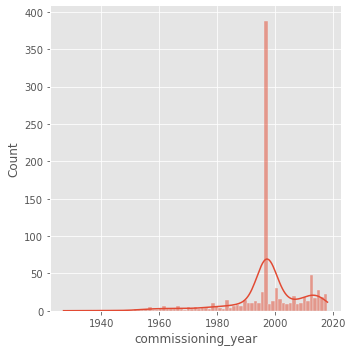

<Figure size 360x360 with 0 Axes>

In [435]:
sns.displot(df["commissioning_year"],kde=True)
plt.figure(figsize=(5,5)) 
plt.show()         
    

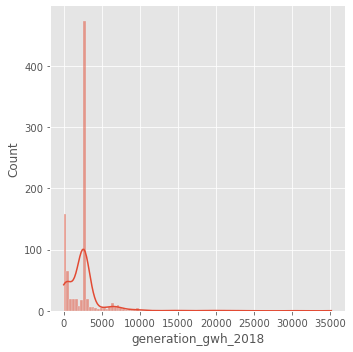

<Figure size 360x360 with 0 Axes>

In [436]:
sns.displot(df["generation_gwh_2018"],kde=True)
plt.figure(figsize=(5,5)) 
plt.show()   

The distribution is skewed

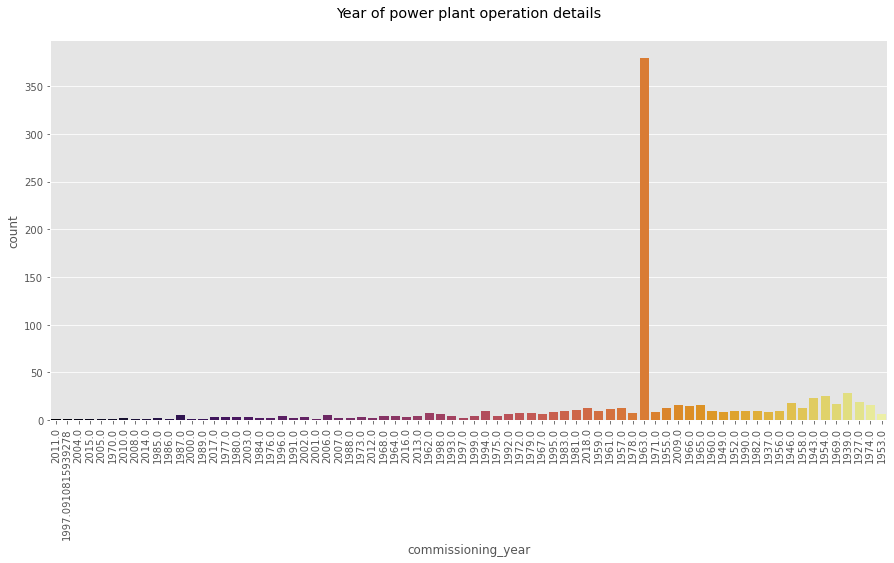

In [437]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
comm = sns.countplot(df["commissioning_year"], palette="inferno")
comm.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.show()


We see that values of year of plant operation, weighted by unit-capacity when data is available.In the year 1963,
capacity was maximum due to mean imputation.

# Bivariate Analysis

<AxesSubplot:title={'center':'primary_fuel'}, ylabel='capacity_mw'>

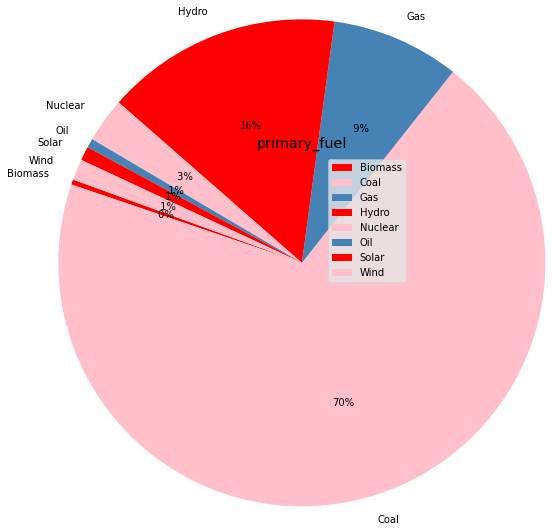

In [438]:
df.groupby(['primary_fuel']).sum().plot(kind='pie', y='capacity_mw', autopct='%2.0f%%',
                                colors = ['red', 'pink', 'steelblue'],radius=2.8,shadow=False,startangle=160,title='primary_fuel')

Thus with the help of pie plot we observe that coal is generating capacity of 70% which is maximum among other fuels ,
followed by Hydro at 16% capacity and then gas at 9% capacity generation and least are nuclear,oil,solar,wind and biomas(0%).

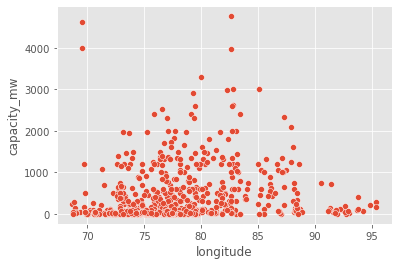

In [439]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.style.use('ggplot')
plt.show()

Thus we see that longitute geolocation  give the place coordinates for electricity generation in mw.We find that coordinates 
between 75 decimal degree to 80 and 85 decimal degree having maximum electrivity geenration in mw. 

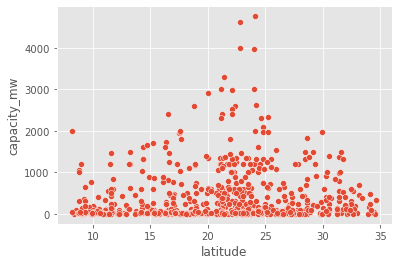

In [440]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.style.use('ggplot')
plt.show()

In [ ]:
Thus we see that latitude geolocation  give the place coordinates for electricity generation in mw.We find that coordinates 
between 20 decimal degree to 25 decimal degree having maximum electrivity generation in mw. 

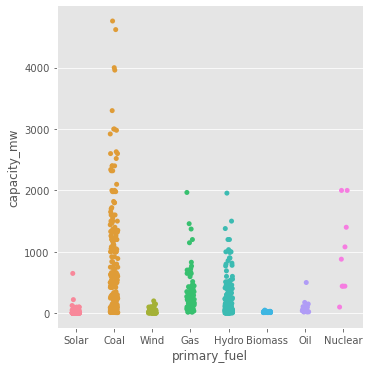

In [441]:
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.style.use('ggplot')

plt.show()

We observe that electricity generation by coall is highest followed by hydro and gas and least is biomass. 

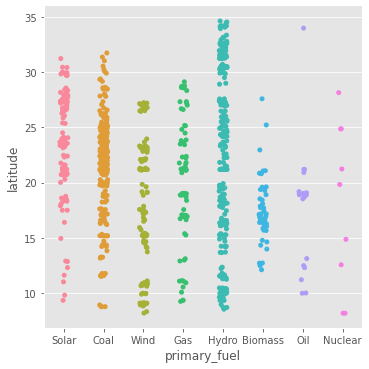

In [442]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.style.use('ggplot')

plt.show()

Thus we see that Hydro fuel is dominated across all the latitudes coordidates of India as it is a water rich country 
with 4% of world’s water resources (India-WRIS wiki 2015)

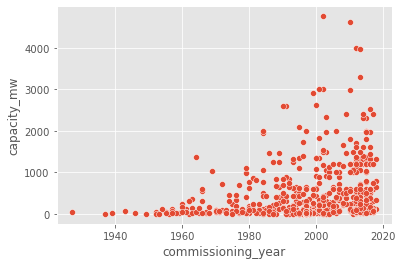

In [443]:
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.style.use('ggplot')

plt.show()

In the olden times,electricirty geenration was very low may be due to poor technology but in recent times power generation has 
increased due to rapid advance in technolody and availability of new adavanced equipments. 

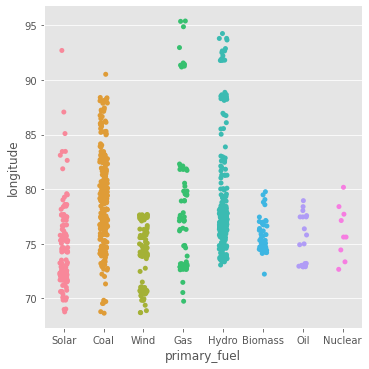

In [444]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.style.use('ggplot')

plt.show()

As far as longitude geolocation coordinated is concerned,coal and hydro both are dominating in their respective zone considering land areas and water bodies
respetively. 

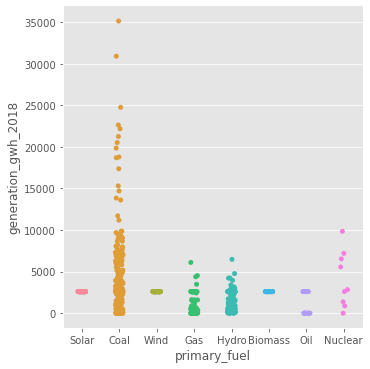

In [445]:
sns.catplot(x = "primary_fuel", y = "generation_gwh_2018", data = df)
plt.style.use('ggplot')

plt.show()

We see that coal is dominating in generation electricity in the year 2018 and least is biomass,solar,wind

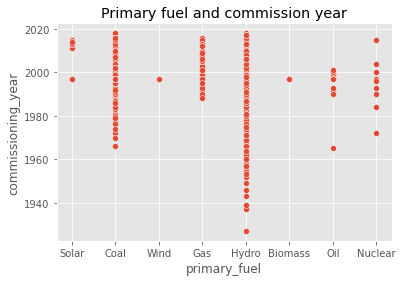

In [446]:
sns.scatterplot(x ="primary_fuel", y = "commissioning_year", data=df);
plt.title('Primary fuel and commission year');

Thus we see that  the hydro power plant is the most popular among the other plants and it was first commissioned.
After that solar,gas came to light.Nuclear can be seen decreasing popularity due to harmfull radiation and negatives
effect on the environment.Recent times,Solar energy is gaining importance as it is deriving enery from the sun.    

<AxesSubplot:>

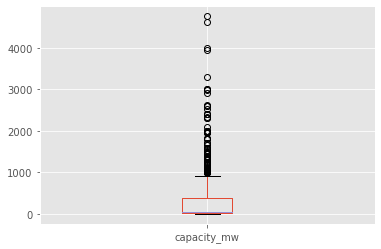

In [447]:
df['capacity_mw'].plot.box()

We can see outliers are present

<AxesSubplot:>

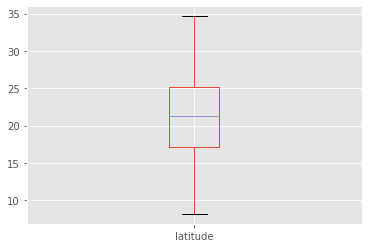

In [448]:
df['latitude'].plot.box() #no outliers present

<AxesSubplot:>

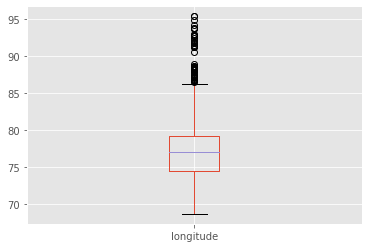

In [449]:
df['longitude'].plot.box()

Outliers are present

<AxesSubplot:>

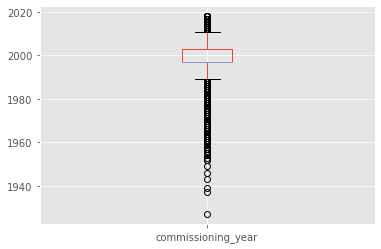

In [450]:
 df['commissioning_year'].plot.box()

Outliers are present

<AxesSubplot:>

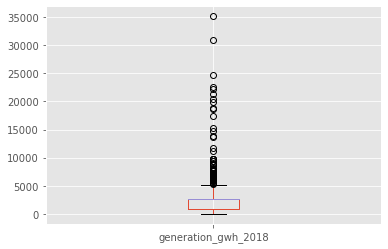

In [451]:
df['generation_gwh_2018'].plot.box()

outliers are present

# Encoding the categorical object into numerical column

In [452]:
# Label Encoder
le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,Ultratech Cement ltd,WRI,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,CDM,WRI,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,Central Electricity Authority,WRI,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,Central Electricity Authority,WRI,7279.000000


In [453]:
#Using Ordinal encoder for categorical featues and it will encode categorical features as an integer array.
oe = OrdinalEncoder()
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df.head() #validation of source column and we can see the changes

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,109.0,1.0,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,174.0,2.0,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,21.0,2.0,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,22.0,2.0,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,22.0,2.0,7279.000000


# Checking Outliers by Zscore technique

In [454]:
df.shape

(907, 8)

In [455]:
z = np.abs(zscore(df))
threshold = 3
dfnew = df[(z<3).all(axis = 1)]

print ("Dataframe Shape before removing outliers: ", df.shape)
print ("Dataframe Shape after removing outliers: ", dfnew.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-dfnew.shape[0])/df.shape[0]*100)

df=dfnew.copy() # reassigning to our original dataframe name

Dataframe Shape before removing outliers:  (907, 8)
Dataframe Shape after removing outliers:  (835, 8)
Percentage of data loss after outlier removal:  7.938257993384785


The percentage of data loss is 7.93 which is lless than 10% we can accept it.

# Multivariate Analaysis

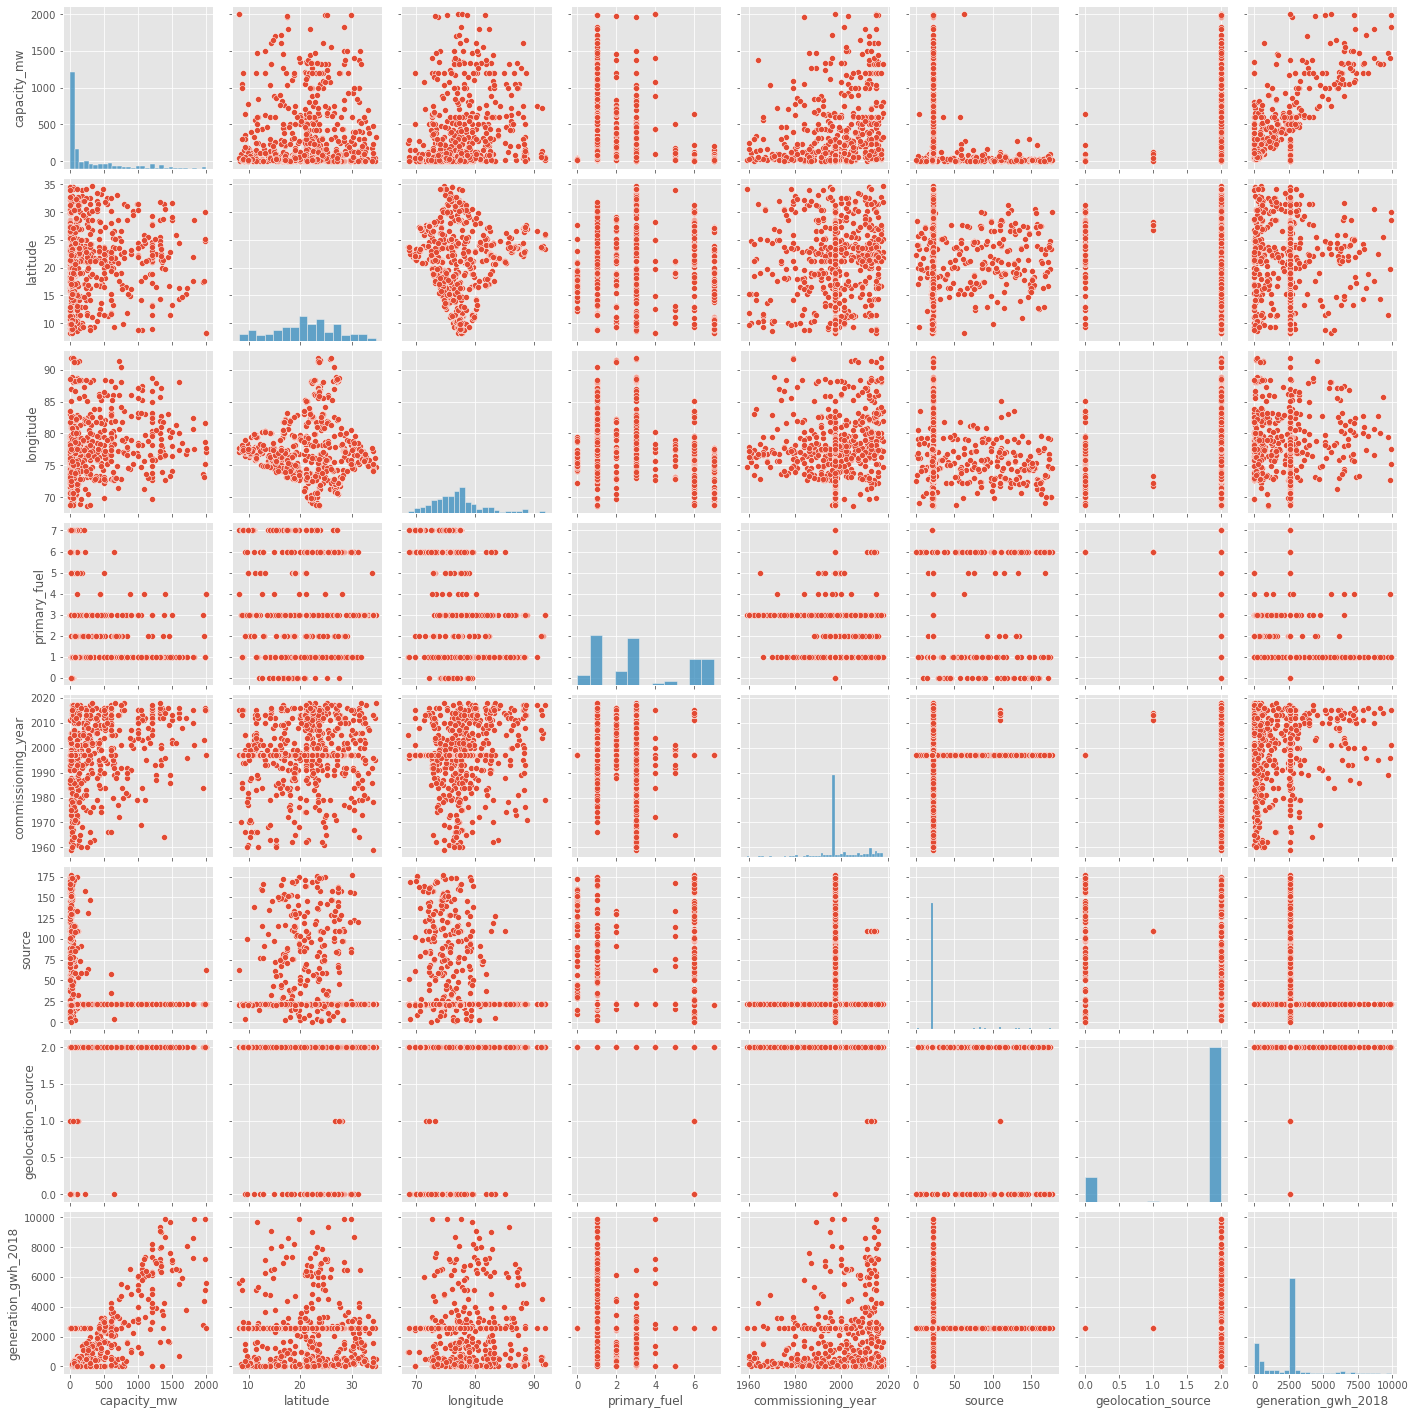

In [456]:
sns.pairplot(df) #shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

The columns shows correlation between the features and there is no strong collinearirty exist between the features. 

# Correlation using a Heatmap

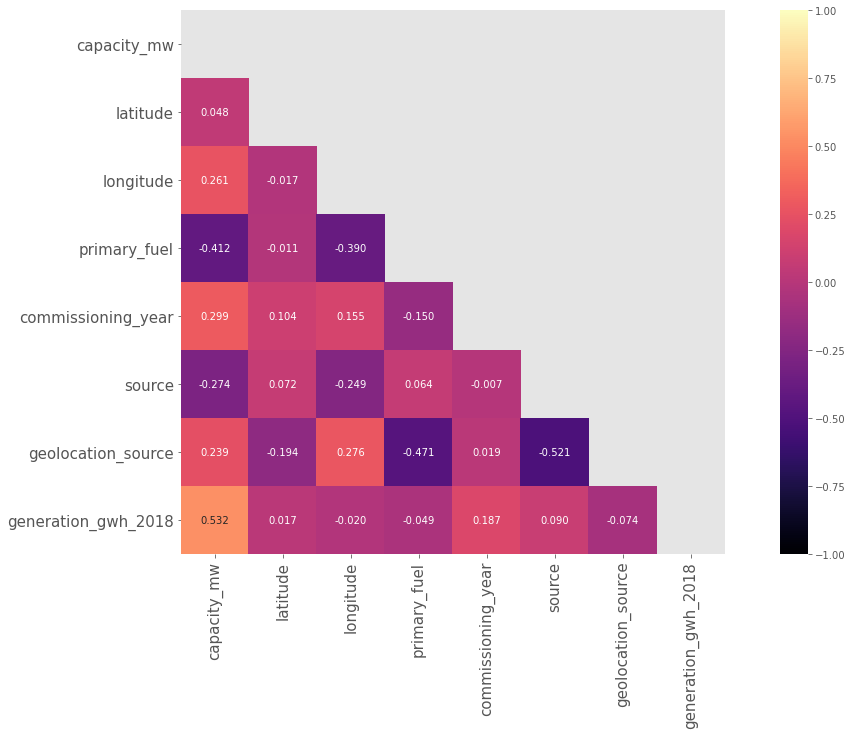

In [457]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="magma", mask=upper_triangle)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

1.A perfect positively correlated linear relationship would have a correlation coefficient of +1. The closer to +1 the coefficient, the more directly correlated the figures are.
2.A perfect negative correlation would have a correlation coefficient of -1. 
 
Thus we can see that features are positvely and negatively correlated with each other. 
primary fuel is negatively correlated with source,primary fuel
primary fuel is negatiley correlated with generation_gwh_2018,geolocation_source and commiioning year
primary fuel is 53.2% correlated with generation_gwh_2018.

In [458]:
#checking correlation between primary_fuel as our target with other features. 
df.corr()["primary_fuel"].sort_values()

geolocation_source    -0.470539
capacity_mw           -0.412261
longitude             -0.390244
commissioning_year    -0.149593
generation_gwh_2018   -0.048677
latitude              -0.011145
source                 0.063886
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

most of the features are negatively correlated

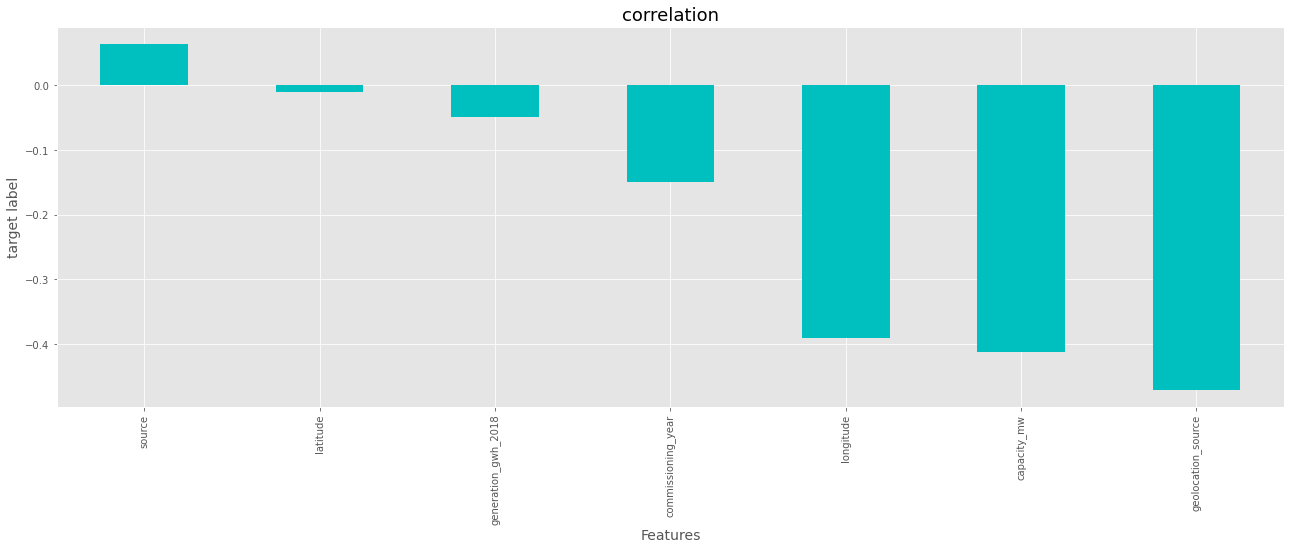

In [459]:
#bar plot showing correlation bw target and features when using classification problem as primary_fuel as target
plt.figure(figsize=(22,7))
dfnew.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

 Considering label as "primary_fuel" which is our classifical analysis then we can see there rae only one positive correlation with target and others are negative correlation with target. 

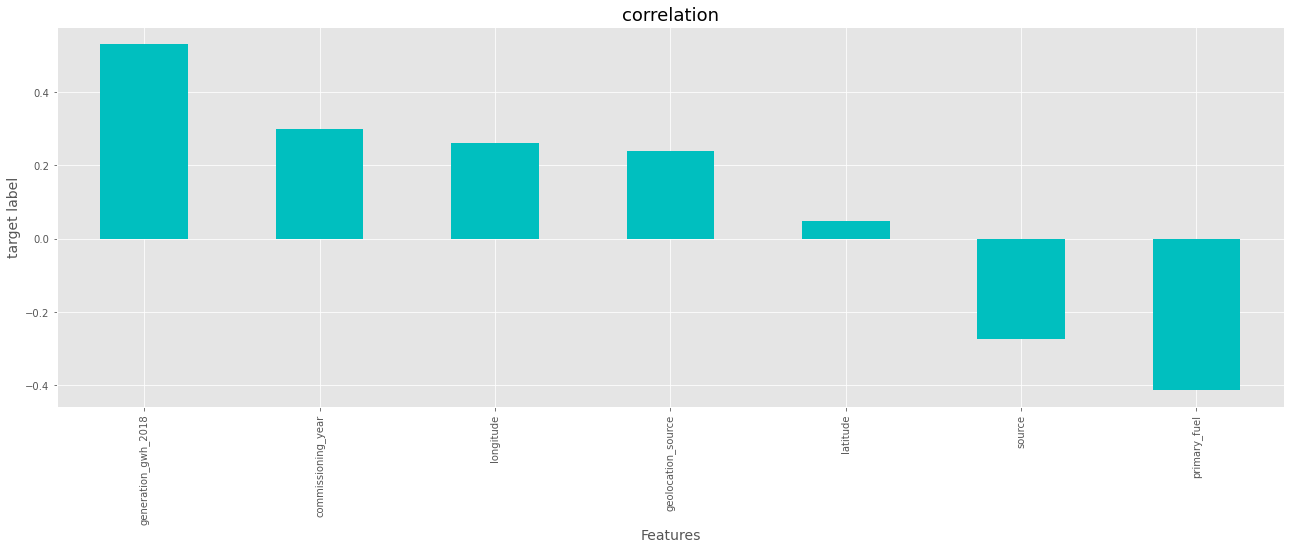

In [460]:
#bar plot showing correlation bw target and features when using classification problem as primary_fuel as target
plt.figure(figsize=(22,7))
dfnew.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Considering capacity_mw as our label for regression problem,we see most of the features are positively correlated with target.

In [266]:
#checking correlation between primary_fuel as our target with other features. 
df.corr()["capacity_mw"].sort_values()

primary_fuel          -0.412261
source                -0.273858
latitude               0.048429
geolocation_source     0.238879
longitude              0.261421
commissioning_year     0.299199
generation_gwh_2018    0.532051
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

Considering label as "capacity_mw" which is our regression analysis then we can see most of the features are positively 
correlation with target and others are negative correlation with target.

# Checking Skewness

In [267]:
df.skew() #checking skewness

capacity_mw            1.951725
latitude              -0.113160
longitude              0.911191
primary_fuel           0.414053
commissioning_year    -0.843485
source                 1.786502
geolocation_source    -2.106224
generation_gwh_2018    1.358324
dtype: float64

# Splitting into x and y before removing skewness

In [268]:
x=df.drop('primary_fuel',axis=1)   #Independent variables
y=df['primary_fuel']    #Dependent or Target Variable

In [269]:
#Checking x data
x.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.000000,109.0,1.0,2600.804099
1,98.0,24.7663,74.6090,1997.091082,174.0,2.0,2600.804099
2,39.2,21.9038,69.3732,1997.091082,21.0,2.0,2600.804099
3,135.0,23.8712,91.3602,2004.000000,22.0,2.0,626.239128
4,1800.0,21.9603,82.4091,2015.000000,22.0,2.0,7279.000000


In [270]:
#Checking y data after splitting
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 835, dtype: int32

# Addressing Multicollinearity via Variance inflation factor(VIF)

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [272]:
def vif_cal():
    vif=pd.DataFrame()
    vif["Features"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [273]:
vif_cal()

              Features  VIF Factor
0          capacity_mw    2.500951
1             latitude   13.577369
2            longitude  377.839163
3   commissioning_year  399.435655
4               source    3.023592
5   geolocation_source   11.001622
6  generation_gwh_2018    4.406312


I am not considering variance inflation factor analysis here because if i try to reduce feature then i will have no feature left 
behind and dataset will become small.So i am retaining the same. 

In [274]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.67140651,  1.1587411 , -0.93045561, ...,  1.61593961,
        -2.28431466,  0.37761835],
       [ 0.20738926,  0.59191161, -0.51382423, ...,  2.09014028,
         0.40363676,  0.37761835],
       [-0.28738658,  0.12091107, -2.35413302, ..., -0.46813798,
         0.40363676,  0.37761835],
       ...,
       [-0.51907747, -0.95398613, -0.24097555, ..., -0.46813798,
         0.40363676,  0.37761835],
       [ 0.09796476,  0.52318985, -0.7714094 , ...,  0.91776733,
         0.40363676,  0.37761835],
       [-0.75163217, -1.79967334,  0.24182209, ..., -0.46813798,
         0.40363676,  0.37761835]])

In [275]:
#  samples to make all the categorical quality values same
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [276]:
y.value_counts() #balanced data

0    232
1    232
2    232
3    232
4    232
5    232
6    232
7    232
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

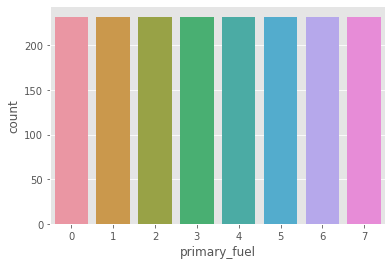

In [277]:
sns.countplot(y) #showing balanced data visiually

# Feature Scaling

In [279]:
#Scaling the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
 
# create data
data = x 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(x)
scaled_data=model.transform(data)
 
# print scaled features
print(scaled_data)


[[0.17503094 0.7488893  0.33700662 ... 0.9480904  0.06910028 0.50679219]
 [0.62189038 0.61757043 0.41769614 ... 0.99826056 1.         0.50679219]
 [0.50421114 0.50845251 0.06128126 ... 0.72759617 1.         0.50679219]
 ...
 [0.40493111 0.0751664  0.56138469 ... 0.72759617 1.         0.50679219]
 [0.70745771 0.23681904 0.55589314 ... 0.72759617 1.         0.50679219]
 [0.64171432 0.04820074 0.56104617 ... 0.72759617 1.         0.50679219]]


# Building the model

As primary_fuel is a multi class classification problem,we cant use logistic regression (it is used for binary classification).
Hence we will be using following models for multiclass classification problem for building the model:

1.Naive Baiyes

2.Decision Tree Classifier

3.Rnadom Forest Classifier

4.KNeighborsClassifier

4.AdaBoost Classifier

5.Extra Tree classifier

In [280]:
#Importing train_test_split and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [282]:
#Finding the best random state and accuracy
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 97 ,the model performs well
Training r2_score is:  36.821856158592546
Testing r2_score is:  36.79876886162483
At random state 116 ,the model performs well
Training r2_score is:  37.00529034788278
Testing r2_score is:  36.993860561292166
At random state 241 ,the model performs well
Training r2_score is:  36.98754206474311
Testing r2_score is:  37.01908334484292
At random state 252 ,the model performs well
Training r2_score is:  36.778590743561615
Testing r2_score is:  36.77353401259836
At random state 276 ,the model performs well
Training r2_score is:  36.886035288341276
Testing r2_score is:  36.92345752275167
At random state 420 ,the model performs well
Training r2_score is:  36.76994105610443
Testing r2_score is:  36.815069065702644
At random state 478 ,the model performs well
Training r2_score is:  36.91441775223166
Testing r2_score is:  36.92297610417974


Thus we see at random_state=97,the model performs well as the training accuracy and testing accuracy is same.

In [284]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=97,test_size=.20)

In [286]:
#Model 1-Decision Tree Classifier

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(random_state=97)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[34  0  1  0  0  0  0  0]
 [ 3 30  6  1  2  2  2  0]
 [ 0  5 44  2  0  4  0  0]
 [ 0  2  3 35  1  0  0  0]
 [ 0  0  1  3 37  1  0  0]
 [ 0  3  1  0  0 42  0  0]
 [ 0  0  0  0  0  1 55  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.75      0.65      0.70        46
           2       0.79      0.80      0.79        55
           3       0.85      0.85      0.85        41
           4       0.93      0.88      0.90        42
           5       0.84      0.91      0.87        46
           6       0.96      0.98      0.97        56
           7       1.00      1.00      1.00        51

    accuracy                           0.88       372
   macro avg       0.88      0.88      0.88       372
weighted avg       0.88      0.88      0.88       372



The accuracy score is 88% .

In [288]:
#Model 2-Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(random_state=97)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[34  1  0  0  0  0  0  0]
 [ 3 32  8  1  2  0  0  0]
 [ 0  4 48  0  1  2  0  0]
 [ 0  2  3 36  0  0  0  0]
 [ 0  0  2  1 39  0  0  0]
 [ 0  0  0  0  0 46  0  0]
 [ 0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.82      0.70      0.75        46
           2       0.79      0.87      0.83        55
           3       0.95      0.88      0.91        41
           4       0.93      0.93      0.93        42
           5       0.96      1.00      0.98        46
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        51

    accuracy                           0.92       372
   macro avg       0.92      0.92      0.92       372
weighted avg       0.92      0.92      0.92       372



The accuracy score is 92%.

In [289]:
#Model 3- KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=15)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[32  0  0  0  0  0  0  3]
 [ 4 26  7  1  2  2  0  4]
 [ 0  5 31  2  5 12  0  0]
 [ 0  3  5 21  5  4  0  3]
 [ 0  0  0  0 42  0  0  0]
 [ 2  0  0  1  0 38  0  5]
 [ 3  1  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.74      0.57      0.64        46
           2       0.72      0.56      0.63        55
           3       0.84      0.51      0.64        41
           4       0.78      1.00      0.88        42
           5       0.68      0.83      0.75        46
           6       1.00      0.93      0.96        56
           7       0.77      1.00      0.87        51

    accuracy                           0.79       372
   macro avg       0.79      0.79      0.78       372
weighted avg       0.79      0.79      0.78       372



The accuracy score is 79% .

In [290]:
#Model 4-Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
model4=GradientBoostingClassifier(random_state=35)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[34  1  0  0  0  0  0  0]
 [ 3 29  9  3  2  0  0  0]
 [ 0  8 44  0  0  3  0  0]
 [ 0  2  2 37  0  0  0  0]
 [ 0  1  1  1 39  0  0  0]
 [ 1  1  3  0  0 41  0  0]
 [ 0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.69      0.63      0.66        46
           2       0.75      0.80      0.77        55
           3       0.90      0.90      0.90        41
           4       0.95      0.93      0.94        42
           5       0.93      0.89      0.91        46
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        51

    accuracy                           0.89       372
   macro avg       0.89      0.89      0.89       372
weighted avg       0.89      0.89      0.89       372



The accuracy score is 89%

In [292]:
#Model 5-SVM
from sklearn.svm import SVC
model5=SVC(random_state=97)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[32  1  0  0  0  0  0  2]
 [ 4 25  7  5  2  1  0  2]
 [ 0  6 28  3  5 11  0  2]
 [ 0  3  6 24  3  2  0  3]
 [ 0  0  0  0 42  0  0  0]
 [ 1  0  0  0  0 40  0  5]
 [ 0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0 51]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.71      0.54      0.62        46
           2       0.68      0.51      0.58        55
           3       0.75      0.59      0.66        41
           4       0.81      1.00      0.89        42
           5       0.74      0.87      0.80        46
           6       1.00      1.00      1.00        56
           7       0.78      1.00      0.88        51

    accuracy                           0.80       372
   macro avg       0.79      0.80      0.79       372
weighted avg       0.79      0.80      0.79       372



The accuracy score of SVM is 80%

Thus we see,

The accuracy score of Decision tree classifier is 88%

The accuracy score of Random Forest Classifier is 92%

The accuracy score of Kneighbors Classifier is 79% 

The accuracy score of Gradient Boosting is 89% 

The accuracy score of Support vector machine (SVM) is 80%

Conclusion: We see that almost all the models are showing good acuracy rate ,now we will check cross validation  for all the models for overfitting.

# CROSS VALIDATION

Performing cross validation in all the models below

In [293]:
scr=cross_val_score(model1,x,y,cv=5)
print("The cross validation score of Desicion Tree Classifier is :",scr.mean())

The cross validation score of Desicion Tree Classifier is : 0.8739298032055185


In [294]:
scr=cross_val_score(model2,x,y,cv=5)
print("The cross validation score of Random Forest Classifier is :",scr.mean())

The cross validation score of Random Forest Classifier is : 0.9310349824652928


In [295]:
scr=cross_val_score(model3,x,y,cv=5)
print("The cross validation score of Kneighbors Classifier is :",scr.mean())

The cross validation score of Kneighbors Classifier is : 0.80763556792163


In [296]:
scr=cross_val_score(model4,x,y,cv=5)
print("The cross validation score of GradientBoosting Classifier is :",scr.mean())

The cross validation score of GradientBoosting Classifier is : 0.9094933773874736


In [297]:
scr=cross_val_score(model5,x,y,cv=5)
print("The cross validation score of SVM Classifier is :",scr.mean())

The cross validation score of SVM Classifier is : 0.8318943280294466


Thus we see that after doing cross validation ,we can see the scores that Cross validation score of most of the models
have been reduced which means that cross validation is not decreasing the accuracy, it is rather giving us a better 
approximation for that accuracy, including less overfitting.So as per the avobe models:

Cross validation score :

Desicion Tree:87%

RandomForest:93%

Kneighbors:81%

GradientBoosting:91%

SVM:83%

So I am taking Random Forest rather for hyperparameter tuning under GridSearch considering the accuracy score and
cross validation score,it is giving better result.

# Hyper parameter tuning

In [298]:
#random forest hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in gridsearchcv
parameters= {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

model2=RandomForestClassifier(random_state=97)
GCV=GridSearchCV(model2,parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
print(GCV.best_params_)#Printing the best parameters obtained
print(GCV.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
0.9056556556556558


In [299]:
#fitting the best parameters
GCV=RandomForestClassifier(max_depth=8,n_estimators=200,criterion='entropy',max_features='auto')
GCV.fit(x_train,y_train)  
pred=GCV.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(GCV,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy score:  88.70967741935483
Cross validation score:  90.13998782714549


After using Hyperparameter tuning, RandomForest Classifier gives an accuracy score of 88.71% and cross validation score of 90.14% and both the scores are very close to each other that means we are in the right direction and considering that the fact that it has reduced the biasesness/overfittedness.We finalize this model as our best model.

# AUC_ROC PLOT FOR MULTICLASS

0.8385438722274369

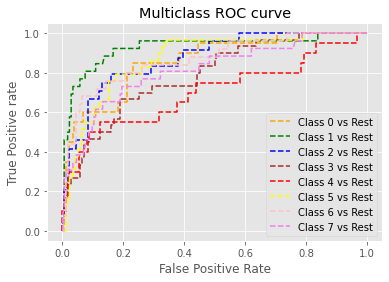

In [394]:
# multi-class classification
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 7 class dataset
x, y = make_classification(n_samples=1000, n_classes=8, n_features=20, n_informative=5, random_state=97)

# split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=97)

# fit model
GCV = OneVsRestClassifier(RandomForestClassifier())
GCV.fit(x_train, y_train)
pred = GCV.predict(x_test)
pred_prob = GCV.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 8

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='brown', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='pink', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='violet', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

#roc auc score
roc_auc_score(y_test, pred_prob, multi_class='ovr', average='weighted')

Thus we see the auc_roc score is 83% which is very good accuracy considering average weighted of all the classes.
In other word we can say that out of 100 prediction,83 predictions will be correct and 17 predictions will be wrong.
It will able to distinguish between different classes.So we will save this model.

# SAVING THE MODEL

In [395]:
#saving the Random forest Model with hypertuning best parameters
import pickle
filename='powerplant_multiclass.pkl'
pickle.dump(GCV,open(filename,'wb'))

# CONCLUSION:

In [396]:
loaded_model=pickle.load(open('powerplant_multiclass.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100) #it gives us 55% accuracy which is not that bad

54.50000000000001


In [397]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_com=pd.DataFrame({"original":a,"Predicted":predicted},index=range(len(a)))
df_com

,original,Predicted
0,1,0
1,3,2
2,3,2
3,3,2
4,4,7
5,2,5
6,6,6
7,0,0
8,4,5
9,7,0


# Regression Analysis

# Splitting the dataset into 2 variables into x and y as independent and dependent variable

In [462]:
x = df.drop('capacity_mw', axis=1)
y = df['capacity_mw']

 Thus we have separated the dataset into features and label where x denotes all the feature columns 
 and y denotes target label column.

In [463]:
x.head() #validating x features variable

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018
0,28.1839,73.2407,6,2011.000000,109.0,1.0,2600.804099
1,24.7663,74.6090,1,1997.091082,174.0,2.0,2600.804099
2,21.9038,69.3732,7,1997.091082,21.0,2.0,2600.804099
3,23.8712,91.3602,2,2004.000000,22.0,2.0,626.239128
4,21.9603,82.4091,1,2015.000000,22.0,2.0,7279.000000


In [464]:
#We are removing skewness from independent variables by using log-transform
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [465]:
y.head() #validating y label 

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [466]:
#Scaling the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
 
# create data
data = x 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(x)
scaled_data=model.transform(data)
 
# print scaled features
print(scaled_data)

[[0.75585062 0.22243808 0.85714286 ... 0.90711631 0.5        0.85510751]
 [0.62678766 0.28600565 0.14285714 ... 0.99671974 1.         0.85510751]
 [0.51868762 0.03621996 1.         ... 0.59652095 1.         0.85510751]
 ...
 [0.26838645 0.3304717  1.         ... 0.59652095 1.         0.85510751]
 [0.61106642 0.24612755 0.14285714 ... 0.79014195 1.         0.85510751]
 [0.06667271 0.4155846  1.         ... 0.59652095 1.         0.85510751]]


# Feature Scaling

# Finding the best random state for Regression Models

In [467]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.41633815528092233 on Random State 104


The best random state is 104 where the score is 42%

# Base Model:Linear Regression

Creating the training and testing data sets

In [468]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=104) #taking the best random state from above

In [469]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([  -0.76050403,  257.21823253,  -73.28533249,    7.78912864,
       -164.78149448,  -27.41115439,   44.77931119])

In [470]:
lr.intercept_ 

-15852.167299618897

In [471]:
#training the model
lr.score(x_train,y_train)


0.2861402158837516

In [472]:
#predicting train
pred_train=lr.predict(x_train)
pred_train

array([ 8.44409397e+01,  2.29035504e+02,  3.85348858e+02,  1.19322847e+02,
        7.10693696e+02,  6.72330639e+02,  6.00923054e+02, -2.73308203e+01,
        5.82478868e+01,  4.68729376e+02,  6.84184666e+02,  9.47479060e+01,
       -8.99063323e+01,  3.44756316e+02,  9.44164836e+01,  5.38811911e+02,
        9.42133054e+01,  5.93415892e+01,  5.94361613e+02, -9.57071892e+01,
        4.35162029e+01,  7.04019500e+02,  4.81429549e+02,  3.66058137e+02,
        2.85114375e+02,  8.26378793e+01,  3.27197798e+02,  3.94640294e+02,
        3.11733149e+02,  3.03933497e+02,  5.52610635e+02,  7.89807955e+01,
        1.11467422e+02,  9.36427163e+01,  6.95375162e+02,  5.04125479e+02,
        1.89242101e+02,  4.94472507e+02,  6.93002347e+02,  1.00527529e+02,
        5.89069591e+01,  4.33071940e+02,  5.74290802e+01,  9.33375129e+01,
        5.68746086e+01,  3.22169767e+02,  7.92185921e+01,  6.41396072e+02,
        7.58364737e+01,  7.33646162e+01,  7.52521953e+01,  9.24750121e+01,
        3.69547996e+02,  

# cross_validation of the model

In [476]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold :",j)
    print("The CV score is :",cv_mean)
    print("The accuracy score for training :",Train_accuracy)
    print("The accuracy score for testing :",Test_accuracy)
    print("\n")

At cross fold : 2
The CV score is : 0.2891194478621759
The accuracy score for training : 0.2861402158837516
The accuracy score for testing : 0.41633815528092233


At cross fold : 3
The CV score is : 0.3067733437916392
The accuracy score for training : 0.2861402158837516
The accuracy score for testing : 0.41633815528092233


At cross fold : 4
The CV score is : 0.3029312678699993
The accuracy score for training : 0.2861402158837516
The accuracy score for testing : 0.41633815528092233


At cross fold : 5
The CV score is : 0.31894720575189095
The accuracy score for training : 0.2861402158837516
The accuracy score for testing : 0.41633815528092233


At cross fold : 6
The CV score is : 0.3141380515011232
The accuracy score for training : 0.2861402158837516
The accuracy score for testing : 0.41633815528092233


At cross fold : 7
The CV score is : 0.2955409340407717
The accuracy score for training : 0.2861402158837516
The accuracy score for testing : 0.41633815528092233


At cross fold : 8
The

As there is no high gap between the testing/training/crossvalidation score so we will take cv=5.

In [473]:
#predicting y_test
pred_test=lr.predict(x_test)
pred_test

array([  58.83232722,  566.29624672,  288.00433414,  352.38203317,
        645.61101956,  490.11697224,  347.81466806,  322.81322374,
        633.78490759,  277.57665719,  532.81103977,  574.25715045,
         80.59436856,  659.40692857,  687.81717842,  639.1449385 ,
        690.84266974,  147.6140695 ,  190.54811407,   87.23721345,
         19.21888044,  646.67358406,  142.37690813,   16.43729972,
         89.50805506,  302.48211811, -139.37421922,  689.22868013,
         64.73086959,  330.34544196,  433.33177366,   11.55277003,
        476.69862815,  135.80272623,  179.76029352,  644.10711131,
        700.96782386, -157.2635701 ,  284.08354865,  621.11621831,
         84.44093972,  261.90824978,  356.26533942,   32.015557  ,
        243.33276278,   57.83919786, -148.42777519,  209.03360953,
        521.12227342,  426.41443718,  304.62668877,  -48.72347399,
        343.92280596, -124.9326947 , -109.20703903,   52.35615298,
        441.86621525,  431.75092607,  -44.80477   ,  501.16612

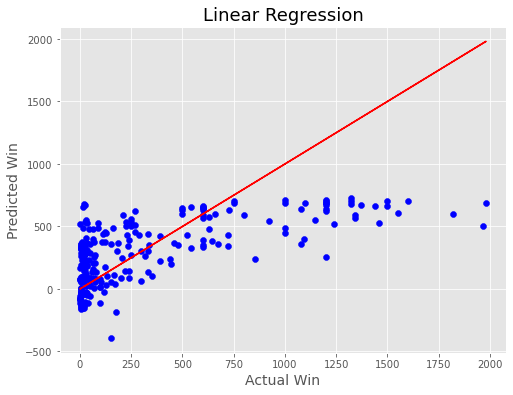

In [477]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Win",fontsize=14)
plt.ylabel("Predicted Win",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [474]:
#testing the model
lr.score(x_test,y_test)

0.41633815528092233

In [475]:
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error :",mean_squared_error(y_test,pred_test))
print("Root mean error :",np.sqrt(mean_squared_error(y_test,pred_test)))
print("R2_Score",r2_score(y_test,pred_test))

Mean absolute error : 237.5167671367099
Mean squared error : 110440.1946842701
Root mean error : 332.32543490420665
R2_Score 0.41633815528092233


Thus we can see the best fit line covering the datapoints ,we can improve more by regularization and hyperparameter technique.
There are some datapoint far away from best fit line,which can increasae the mse error so we need to regularise and 
improve the r2_score.

# REGULARIZATION

In [478]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score

In [479]:
rdg=Ridge(alpha=0.001,random_state=700)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.2861402153871223

In [480]:
#Lasso model training
ls=Lasso(alpha= 0.1, random_state= 700)
ls.fit(x_train,y_train)   
ls_score_training=ls.score(x_train,y_train) 
pred_ls=ls.predict(x_test) 
ls_score_training*100 

28.61166860447937

In [481]:
predict=rdg.predict(x_test)

In [482]:
r2_score(y_test,predict)

0.41633657695202075

In [483]:
lso=Lasso(alpha=0.0001,random_state=833)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.28614021586022864

In [484]:
predict1=lso.predict(x_test)
predict1

array([  58.83528551,  566.29360656,  288.00633668,  352.38316633,
        645.60706765,  490.11785845,  347.81657648,  322.81309375,
        633.78447869,  277.57634968,  532.81205722,  574.25322859,
         80.59422792,  659.40322413,  687.81728596,  639.14434037,
        690.83947798,  147.61238295,  190.54903038,   87.2324801 ,
         19.2206194 ,  646.67397269,  142.37680842,   16.43632518,
         89.50732139,  302.48266744, -139.37385803,  689.22473096,
         64.73280582,  330.34630849,  433.3327208 ,   11.5543419 ,
        476.70174909,  135.80449711,  179.7625054 ,  644.10498992,
        700.96686386, -157.26189901,  284.08459091,  621.11427218,
         84.43989556,  261.91025594,  356.26608094,   32.01461293,
        243.33193257,   57.84188287, -148.42863371,  209.03369391,
        521.12356743,  426.41562067,  304.626898  ,  -48.72890905,
        343.92112316, -124.93395136, -109.20640926,   52.36017387,
        441.86093972,  431.74747487,  -44.80463888,  501.16874

In [485]:
r2_score(y_test,predict1)

0.4163377589936531

# Finding the best model


We will be using  LinearRegression, SVR, DecisionTreeRegressor ,KNeighborsRegressor ,RandomForestRegressor,
GradientBoostingRegressor algorithms for finding out the best model among those

In [492]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error 

In [493]:
LR=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

In [494]:
models= []
models.append(('Linear Regression',LR))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rfr))
models.append(('GradientBoostingRegressor',gbr))

In [495]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [496]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


accuracy_score:  0.41633815528092233


cross_val_score:  0.31894720575189095


Root Mean Squared Error:  332.32543490420665



****************************** Support Vector Regressor ***************************


SVR()


accuracy_score:  -0.2736237576522731


cross_val_score:  -0.2710926672912639


Root Mean Squared Error:  490.91183904634096



****************************** Decision Tree Regressor ***************************


DecisionTreeRegressor()


accuracy_score:  0.6169806654845109


cross_val_score:  0.5484587528225323


Root Mean Squared Error:  269.21129598592313



****************************** KNeighbors Regressor ***************************


KNeighborsRegressor()


accuracy_score:  0.604311247273014


cross_val_score:  0.4851421831685235


Root Mean Squared Error:  273.6275254750969



****************************** RandomForestRegressor ***************************


Rand

In [497]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'Root_Mean_Squared_error':rmse})
result

,Model,Accuracy_score,Cross_val_score,Root_Mean_Squared_error
0,Linear Regression,41.633816,31.894721,332.325435
1,Support Vector Regressor,-27.362376,-27.109267,490.911839
2,Decision Tree Regressor,61.698067,54.845875,269.211296
3,KNeighbors Regressor,60.431125,48.514218,273.627525
4,RandomForestRegressor,81.030589,74.210557,189.456648
5,GradientBoostingRegressor,81.405337,74.911410,187.575921


The best model from the above algorithms is Random Forest Regressor and GradientBoosting Regreser which are ensemble models
which is giving an accuracy score of 81.03 and cross validation score of 74.21 in case of random forest whereas accuracy score of 81.40
and cross validation score of 74.91 in case of gradient boosting and their RMSE score is also less. 
Lesser the RMSE score, the better model we can build. 
Now we will try to find the best parameters and increase the accuracy score 
of the model by using Hyperparameter Tuning.

# Hyperparameter Tuning

In [503]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
parameters= {'n_estimators': [200, 500],
             'criterion':['squared_error','absolute_error'], 
             'max_features':['auto','sqrt','log2'],
             'max_depth' : [4,5,6,7,8],
}
rfr=RandomForestRegressor(random_state=97)
GCVr=GridSearchCV(rfr,parameters,cv=5,scoring='accuracy')
GCVr.fit(x_train,y_train)
print(GCVr.best_params_)#Printing the best parameters obtained
print(GCVr.best_score_) #Mean cross-validated score of best_estimator   

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
nan


In [507]:
#fitting the best parameters
rfr=RandomForestRegressor(max_depth=4,n_estimators=200,criterion='squared_error',max_features='auto')
rfr.fit(x_train,y_train)  
rfr.score(x_train,y_train)
pred_test=rfr.predict(x_test)

rfs=r2_score(y_test,pred_test)
print('R2 Score',rfs*100)

rfscore=cross_val_score(rfr,x,y,cv=8)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score 80.92603073966997
Cross Val Score: 74.58922082765804


In [508]:
from sklearn.ensemble import GradientBoostingRegressor
parameters= { 'loss':['squared_error','absolute_error'],
              'learning_rate':[0.1,0.01], 
              'n_estimators':[2,5,10,20],
               'criterion':['mae','mse'],      
            }

gbr=GradientBoostingRegressor()
GCVr=GridSearchCV(gbr,parameters)
GCVr.fit(x_train,y_train)
print(GCVr.best_params_)
#{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 20}

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 20}


In [509]:
gbr=GradientBoostingRegressor(learning_rate= 0.1, loss= 'squared_error',n_estimators= 20, criterion= 'mse')
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_decision=gbr.predict(x_test)

gbs=r2_score(y_test,pred_decision)
print('R2 Score',gbs*100)

gbscore=cross_val_score(gbr,x,y,cv=5)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

R2 Score 78.30669803526492
Cross Val Score: 73.58380219718961


In [ ]:
Thus comparing all above model, we find that Random Forest Regressor is giving better score after hyperparametr considering the
accuracy score of 80.9% and the r2_score of 74.5%  and the gap is very less so we are in the right direction.
This shows our model is performing well.Thus this model is able to predict well total capacity_mw generated from power plant.

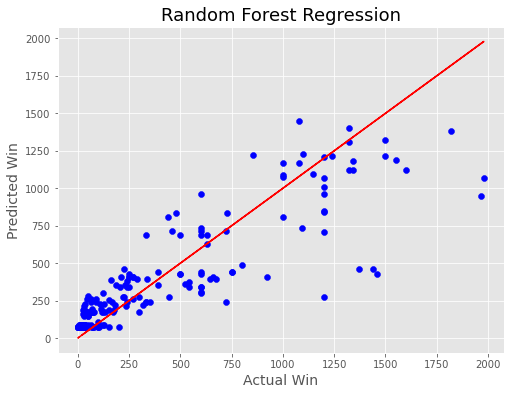

In [522]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Win",fontsize=14)
plt.ylabel("Predicted Win",fontsize=14)
plt.title("Random Forest Regression",fontsize=18)
plt.show()

This is the best fit curve using Random Forest Regressor.

In [514]:
coef = pd.DataFrame(index = x.columns, data = np.round(rfr.feature_importances_,2), columns = {'Importance'})
coef.sort_values(ascending=True, inplace = True, by = 'Importance')

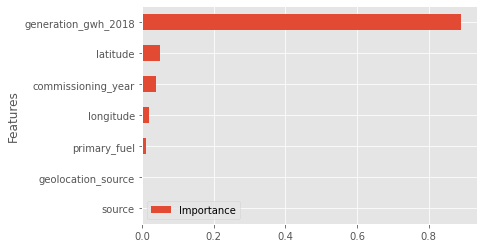

In [515]:
coef.plot.barh()
plt.ylabel("Features")
plt.show()

Thus we see that genertaion_gwh_2018(the most imporant features),latitude,commissioning_year are the important features for
predicting capacity_mw.

# Saving the model :Randon Forest Regressor :Best Model

In [517]:
import pickle
filename='Powerplant_regressor.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [523]:
loaded_model=pickle.load(open('Powerplant_regressor.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

80.92603073966997


The loaded_model precits accuracy of 80% which is quite good enough.

# Prediction Results

In [526]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275
Predicted,35.361064,248.736652,35.361064,410.278964,868.974496,215.486625,861.92816,35.361064,489.837517,35.361064,40.406992,851.876572,170.571149,490.132535,1177.343282,1160.138646,1078.603757,205.132382,35.361064,195.781491,108.020978,685.425937,35.361064,108.439306,35.361064,201.622527,35.361064,887.231036,292.385129,417.262139,432.745996,35.361064,843.198122,195.921757,270.399434,1075.387498,1370.925199,35.361064,40.406992,471.799736,35.361064,35.361064,1464.001177,122.053175,720.830864,35.361064,35.361064,170.571149,1358.413952,442.054314,210.861849,48.82446,769.143083,35.361064,35.361064,35.361064,180.590124,208.591377,170.571149,1059.937466,196.935936,1269.370129,40.406992,35.361064,290.255707,207.120357,366.922859,44.237687,35.361064,35.361064,502.777996,40.406992,35.361064,35.361064,35.361064,35.361064,49.283615,1375.095293,35.361064,233.313783,35.361064,1318.237136,479.982771,49.283615,35.361064,35.361064,432.587312,35.361064,35.361064,35.361064,35.361064,46.44686,35.361064,35.361064,49.283615,1367.590511,464.602636,191.054752,1257.025035,40.406992,630.646355,35.361064,516.208117,364.530378,35.361064,630.525728,1198.317156,40.406992,1467.004739,843.794678,40.406992,421.936859,45.945433,40.620003,35.361064,1463.979698,213.172358,179.888696,170.571149,35.361064,496.334854,40.620003,426.339388,40.406992,299.659976,46.44686,35.361064,35.361064,35.361064,1556.718232,35.361064,35.361064,255.189081,35.361064,155.693014,35.361064,326.97526,170.571149,118.804254,35.361064,35.361064,171.351232,40.406992,35.361064,471.154405,293.579115,35.361064,434.675828,37.715298,174.364322,35.361064,35.361064,1391.243061,214.242766,35.361064,331.169921,35.361064,833.092613,35.361064,35.361064,35.361064,205.630021,35.361064,174.128689,449.994713,260.856009,484.310183,171.351232,234.109564,35.361064,40.406992,220.715292,35.361064,774.875997,44.237687,39.645966,35.361064,209.519696,35.361064,40.406992,170.571149,46.112912,35.361064,35.361064,1234.786303,171.765136,40.406992,35.361064,476.668044,51.415794,774.415951,40.406992,225.704865,40.406992,229.850165,44.237687,40.406992,1067.122592,46.44686,251.120757,171.765136,40.406992,35.361064,35.361064,1261.250198,35.361064,35.361064,35.361064,35.361064,195.121927,40.406992,901.182813,469.370973,35.361064,433.872517,406.854742,675.295502,467.895298,35.361064,35.361064,171.351232,1409.781674,35.361064,1307.745859,580.241905,35.361064,223.390598,35.361064,35.361064,177.939044,170.571149,40.406992,35.361064,35.361064,188.246604,495.941798,573.585979,35.361064,171.351232,187.499173,40.406992,1294.585104,484.570188,214.599908,35.361064,35.361064,193.378397,35.361064,118.804254,35.361064,35.361064,128.219155,629.789701,35.361064,195.121927,466.758653,171.765136,1022.243116,1124.256782,35.361064,37.715298,35.361064,170.571149,1175.600103,100.890662,35.361064,39.645966,1420.413362,40.406992,339.542786,35.361064,35.361064,40.406992,40.406992,35.361064,35.361064
Original,35.361064,248.736652,35.361064,410.278964,868.974496,215.48662